In [1]:
! pip install clevercsv
import pandas as pd
import numpy as np
import clevercsv
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("bank-full.csv",sep=';')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [14]:
df=df[["default","housing","loan","y"]]

In [15]:
df

,default,housing,loan,y
0,no,yes,no,0
1,no,yes,no,0
2,no,yes,yes,0
3,no,yes,no,0
4,no,no,no,0
...,...,...,...,...
45206,no,no,no,1
45207,no,no,no,1
45208,no,no,no,1
45209,no,no,no,0


In [16]:
df.y[df.y=='yes']=1
df.y[df.y=='no']=0


In [17]:
df

,default,housing,loan,y
0,no,yes,no,0
1,no,yes,no,0
2,no,yes,yes,0
3,no,yes,no,0
4,no,no,no,0
...,...,...,...,...
45206,no,no,no,1
45207,no,no,no,1
45208,no,no,no,1
45209,no,no,no,0


In [19]:
#converting y(Boolean values) values to binary
df.default[df.default == 'yes'] = 1
df.default[df.default == 'no'] = 0


In [20]:
#converting y(Boolean values) values to binary
df.loan[df.loan == 'yes'] = 1
df.loan[df.loan == 'no'] = 0

In [21]:
#converting y(Boolean values) values to binary
df.housing[df.housing == 'yes'] = 1
df.housing[df. housing== 'no'] = 0

In [22]:
df

,default,housing,loan,y
0,0,1,0,0
1,0,1,0,0
2,0,1,1,0
3,0,1,0,0
4,0,0,0,0
...,...,...,...,...
45206,0,0,0,1
45207,0,0,0,1
45208,0,0,0,1
45209,0,0,0,0


In [28]:
X=df[["default","housing","loan"]]

In [36]:
y=df["y"]
Y=y.astype("int")


In [38]:
#Logistic regression and fit the model
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [40]:
Y_pred=classifier.predict(X)

In [41]:
print(Y_pred)

[0 0 0 ... 0 0 0]


In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,Y_pred)
print (confusion_matrix)

[[39922     0]
 [ 5289     0]]


In [46]:

from sklearn.metrics import classification_report
print(classification_report(Y,Y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     39922
           1       0.00      0.00      0.00      5289

    accuracy                           0.88     45211
   macro avg       0.44      0.50      0.47     45211
weighted avg       0.78      0.88      0.83     45211



C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
df.corr()

""


Text(0, 0.5, 'True Positive Rate')

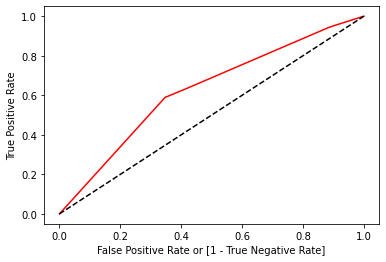

In [48]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, Y_pred)2

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


<AxesSubplot:>

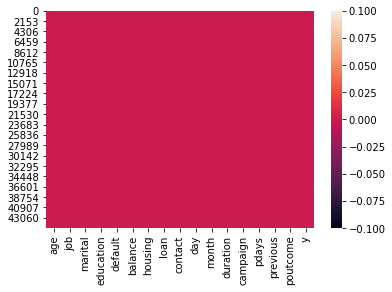

In [4]:
sns.heatmap(df.isnull())

In [5]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [6]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

<AxesSubplot:xlabel='education', ylabel='count'>

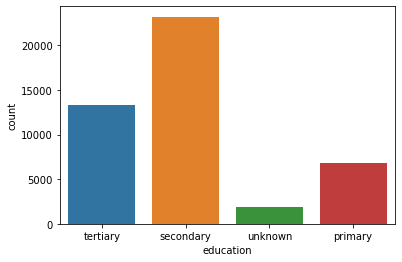

In [7]:
sns.countplot(x='education',data=df)

In [8]:
stats.mode(df['education'])

ModeResult(mode=array(['secondary'], dtype=object), count=array([23202]))

In [9]:
df.drop(["job"],inplace=True,axis = 1)
df.drop(["contact"],inplace=True,axis = 1)
df.drop(["day"],inplace=True,axis = 1)
df.drop(["month"],inplace=True,axis = 1)
df.drop(["poutcome"],inplace=True,axis = 1)

In [10]:
df

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,married,tertiary,no,2143,yes,no,261,1,-1,0,no
1,44,single,secondary,no,29,yes,no,151,1,-1,0,no
2,33,married,secondary,no,2,yes,yes,76,1,-1,0,no
3,47,married,unknown,no,1506,yes,no,92,1,-1,0,no
4,33,single,unknown,no,1,no,no,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,married,tertiary,no,825,no,no,977,3,-1,0,yes
45207,71,divorced,primary,no,1729,no,no,456,2,-1,0,yes
45208,72,married,secondary,no,5715,no,no,1127,5,184,3,yes
45209,57,married,secondary,no,668,no,no,508,4,-1,0,no


In [11]:
df.head()

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,married,tertiary,no,2143,yes,no,261,1,-1,0,no
1,44,single,secondary,no,29,yes,no,151,1,-1,0,no
2,33,married,secondary,no,2,yes,yes,76,1,-1,0,no
3,47,married,unknown,no,1506,yes,no,92,1,-1,0,no
4,33,single,unknown,no,1,no,no,198,1,-1,0,no


In [12]:
df = pd.get_dummies(df,drop_first=True)

In [13]:
df

,age,balance,duration,campaign,pdays,previous,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,58,2143,261,1,-1,0,1,0,0,1,0,0,1,0,0
1,44,29,151,1,-1,0,0,1,1,0,0,0,1,0,0
2,33,2,76,1,-1,0,1,0,1,0,0,0,1,1,0
3,47,1506,92,1,-1,0,1,0,0,0,1,0,1,0,0
4,33,1,198,1,-1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,1,0,0,1,0,0,0,0,1
45207,71,1729,456,2,-1,0,0,0,0,0,0,0,0,0,1
45208,72,5715,1127,5,184,3,1,0,1,0,0,0,0,0,1
45209,57,668,508,4,-1,0,1,0,1,0,0,0,0,0,0


In [16]:
from sklearn.model_selection import train_test_split

In [18]:
df.columns
X = df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes']]
y = df['y_yes']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Gitanjali\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
predictions = logmodel.predict(X_test)

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     13175
           1       0.57      0.20      0.30      1745

    accuracy                           0.89     14920
   macro avg       0.74      0.59      0.62     14920
weighted avg       0.86      0.89      0.86     14920

